In [42]:
# Sales Forecasting with Machine Learning
# Project 2


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


LOAD DATSET

In [12]:
df = pd.read_csv(
    "/content/drive/MyDrive/Sample - Superstore.csv",
    encoding="latin1")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


DATA TYPES

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

CONVERT ORDER DATE TO DATE TIME

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

AGGREGATING SALES BY DATE

In [15]:
monthly_sales = (
    df.groupby(df["Order Date"].dt.to_period("M"))["Sales"]
      .sum()
      .reset_index()
)

monthly_sales["Order Date"] = monthly_sales["Order Date"].dt.to_timestamp()
monthly_sales.head()


,Order Date,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


SALES TREND

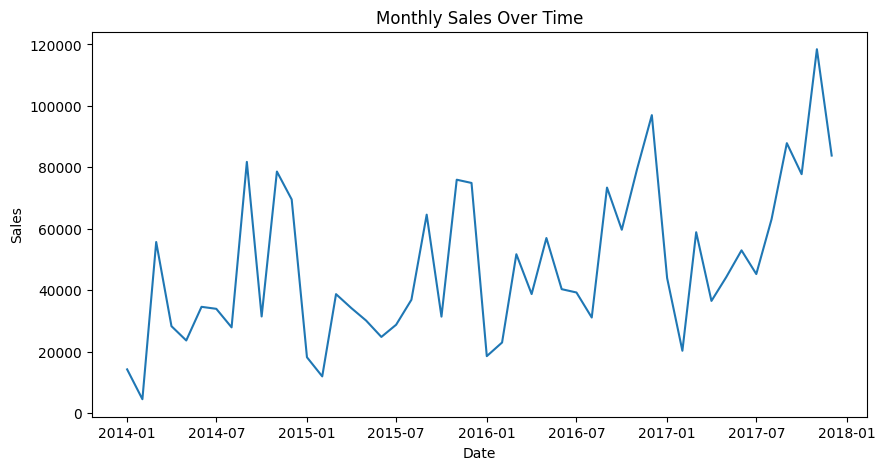

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"])
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


EXPLORATORY DATA ANALYSIS

In [21]:
df.shape

(9994, 21)

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [24]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Order Date"].min(), df["Order Date"].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#Exploratory Data Analysis (EDA) Summary

- The dataset contains retail sales transactions across multiple years.
- Sales values show variability with clear upward and seasonal patterns.
- No critical missing values were found in the target variable (Sales).
- Monthly aggregation reveals trends suitable for forecasting.
- The data is appropriate for building regression-based forecasting models.




FEATURE ENGINNERING FOR SALES FORCEASTING

Time Based Features

In [25]:
monthly_sales["year"] = monthly_sales["Order Date"].dt.year
monthly_sales["month"] = monthly_sales["Order Date"].dt.month

monthly_sales.head()


,Order Date,Sales,year,month
0,2014-01-01,14236.895,2014,1
1,2014-02-01,4519.892,2014,2
2,2014-03-01,55691.009,2014,3
3,2014-04-01,28295.345,2014,4
4,2014-05-01,23648.287,2014,5


Define Features(X) and Target(y)

In [26]:
X = monthly_sales[["year", "month"]]
y = monthly_sales["Sales"]


Train Test Split

In [28]:
split_index = int(len(monthly_sales) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]
X_train.shape, X_test.shape


((38, 2), (10, 2))

MODEL TRAINING

Train Linear Regression

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

Evaluate Linear Regression

In [30]:
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

lr_mae, lr_rmse, lr_r2

(11599.752647028372, np.float64(17017.193217903026), 0.48995195867462704)

Train Random Forest Regressor

In [32]:

rf_model = RandomForestRegressor(n_estimators=200,random_state=42)

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

Evaluate Random Forest Regressor

In [33]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

rf_mae, rf_rmse, rf_r2

(14701.04630639996, np.float64(17985.24880835837), 0.43027126443457553)

Compare Models

In [34]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [lr_mae, rf_mae],
    "RMSE": [lr_rmse, rf_rmse],
    "R2": [lr_r2, rf_r2]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,11599.752647,17017.193218,0.489952
1,Random Forest,14701.046306,17985.248808,0.430271


**Interpretation of the above model performance**


Two models were evaluated for monthly sales forecasting: Linear Regression and Random Forest Regressor.

The Linear Regression model achieved lower MAE and RMSE values and a higher R² score compared to the Random Forest model, indicating better overall predictive performance on the test set.

This result suggests that the relationship between time-based features (year and month) and sales is largely linear in this dataset. Since only basic temporal features were used and the data was aggregated at a monthly level, the simpler linear model was sufficient to capture the underlying trend and seasonality.

The Random Forest model, while more flexible, did not outperform Linear Regression due to the limited number of input features and the absence of lag-based variables. This highlights the importance of model selection based on data characteristics rather than model complexity alone.


VISUALIZATION, FORECASTING AND OUTPUTS

Plotting actual vs predicted sales

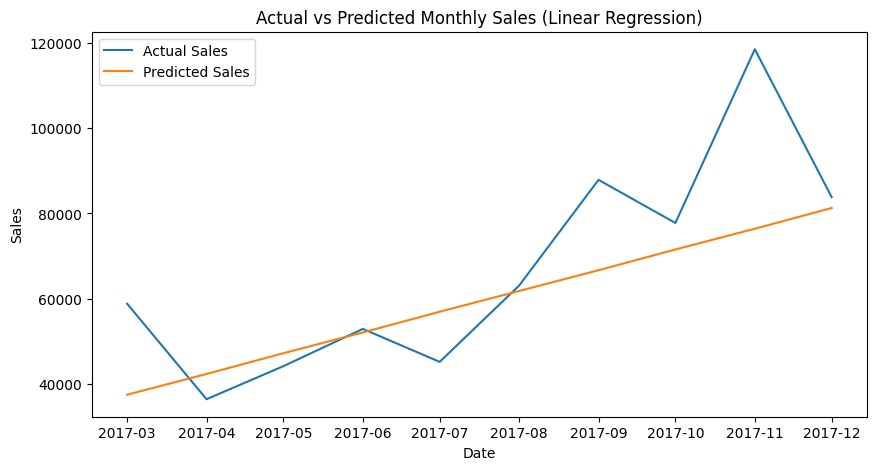

In [36]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Order Date"].iloc[split_index:], y_test.values, label="Actual Sales")
plt.plot(monthly_sales["Order Date"].iloc[split_index:], lr_predictions, label="Predicted Sales")

plt.title("Actual vs Predicted Monthly Sales (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


#Actual vs Predicted Sales Interpretation

The predicted sales follow the overall upward trend of the actual monthly sales, indicating that the linear regression model successfully captures the long-term growth pattern in the data.

While the model smooths out sharp month-to-month fluctuations and does not fully capture extreme peaks and dips, it provides a reasonable approximation of sales behaviour over time. This suggests the model is suitable for understanding general trends and supporting high-level planning decisions rather than precise short-term predictions.


Future dates for forecasting

In [38]:
last_date = monthly_sales["Order Date"].max()

future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthBegin(1),
    periods=6,
    freq="ME"
)

future_df = pd.DataFrame({"Order Date": future_dates})
future_df["year"] = future_df["Order Date"].dt.year
future_df["month"] = future_df["Order Date"].dt.month

future_df


,Order Date,year,month
0,2018-01-31,2018,1
1,2018-02-28,2018,2
2,2018-03-31,2018,3
3,2018-04-30,2018,4
4,2018-05-31,2018,5
5,2018-06-30,2018,6


In [39]:
future_predictions = lr_model.predict(future_df[["year", "month"]])

future_df["Predicted Sales"] = future_predictions
future_df


,Order Date,year,month,Predicted Sales
0,2018-01-31,2018,1,33378.785736
1,2018-02-28,2018,2,38234.967160
2,2018-03-31,2018,3,43091.148585
3,2018-04-30,2018,4,47947.330010
4,2018-05-31,2018,5,52803.511435
5,2018-06-30,2018,6,57659.692860


Historical and forcasted sales visaulization

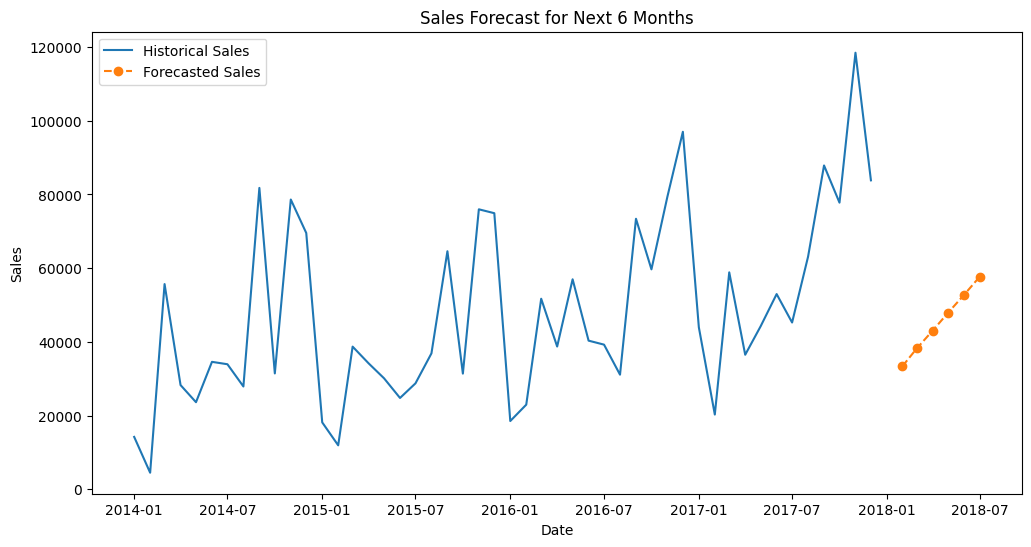

In [40]:
plt.figure(figsize=(12,6))

plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"], label="Historical Sales")
plt.plot(future_df["Order Date"], future_df["Predicted Sales"],
         linestyle="--", marker="o", label="Forecasted Sales")

plt.title("Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


#Sales Forecast Interpretation

The forecast extends historical sales patterns into the next six months, indicating a steady upward trend in expected sales performance.

The projected values align with the overall growth observed in the historical data, providing a forward-looking estimate that can be used for strategic planning, budgeting, and inventory management. As with any forecast, these projections represent expected trends rather than exact future outcomes.


Saving the results to CSV

In [41]:
monthly_sales.to_csv("monthly_sales.csv", index=False)
results.to_csv("model_comparison_results.csv", index=False)
future_df.to_csv("sales_forecast_next_6_months.csv", index=False)


#Project Summary

This project developed a machine learning-based approach to forecast monthly retail sales using historical transaction data.

After aggregating sales at a monthly level and engineering time-based features, two models were evaluated: Linear Regression and Random Forest Regressor. Linear Regression achieved better performance, demonstrating that simpler models can be effective when data exhibits strong temporal trends.

The final model was used to forecast sales for the next six months, providing actionable insights that can support inventory planning, budgeting, and strategic decision-making.
